<a href="https://colab.research.google.com/github/Ramyrahmeni/DeepLearning/blob/main/Network_earlystopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.optimizers import Adam ,RMSprop
from keras import  backend as K

In [2]:
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

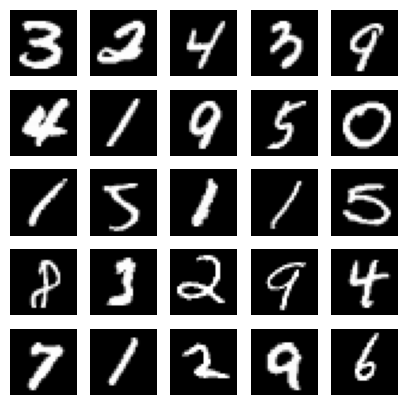

In [5]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [6]:
image_size=28
input_size = image_size * image_size
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [7]:
x_train.shape

(60000, 784)

In [8]:
print(y_train.shape)

(60000,)


In [11]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [9]:
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import regularizers

In [12]:
num_labels=10
model = Sequential()
#model.add(Dense(784, input_dim=input_size, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(784, input_dim=input_size, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dropout(dropout))
model.add(Dense(784, activation='relu'))
#model.add(Dropout(dropout))
model.add(Dense(784, activation='relu'))
#model.add(Dropout(dropout))
model.add(Dense(500, activation='relu'))
#model.add(Dropout(dropout))
model.add(Dense(500, activation='relu'))
#model.add(Dropout(dropout))
#model.add(Dropout(dropout))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(dropout))
model.add(Dense(100, activation='relu'))
model.add(Dropout(dropout))
#model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [13]:
from sklearn.preprocessing import OneHotEncoder
y_train=np.reshape(y_train,(-1,1))
print(y_train.shape)
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
#.toarray()
enc_df = enc.fit_transform(y_train).toarray()
print(enc_df.shape)

(60000, 1)
(60000, 10)


In [14]:
y_test=np.reshape(y_test,(-1,1))
enc_df2 = enc.fit_transform(y_test).toarray()
print(enc_df2.shape)

(10000, 10)


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#save_best_only=True
model.fit(x_train, enc_df, epochs=22, batch_size=batch_size, validation_data=(x_test,enc_df2))

Epoch 1/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step - accuracy: 0.8226 - loss: 0.9270 - val_accuracy: 0.9610 - val_loss: 0.3276
Epoch 2/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9594 - loss: 0.3346 - val_accuracy: 0.9631 - val_loss: 0.2692
Epoch 3/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.9695 - loss: 0.2478 - val_accuracy: 0.9633 - val_loss: 0.2433
Epoch 4/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.9730 - loss: 0.2173 - val_accuracy: 0.9662 - val_loss: 0.2214
Epoch 5/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step - accuracy: 0.9739 - loss: 0.1952 - val_accuracy: 0.9729 - val_loss: 0.2042
Epoch 6/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - accuracy: 0.9757 - loss: 0.1804 - val_accuracy: 0.9683 - val_loss: 0.2093
Epoch 7/22
167/469 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.9803 - loss: 0.1616

KeyboardInterrupt: 

In [ ]:
#Remarques
# c'est ainsi qu'on peux ajouter le regulizer
from tensorflow.keras import layers
from tensorflow.keras import regularizers

layer = layers.Dense(
    units=64,
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 784)               615440    
                                                                 
 dense_2 (Dense)             (None, 500)               392500    
                                                                 
 dense_3 (Dense)             (None, 256)               128256    
                                                                 
 dense_4 (Dense)             (None, 100)               25700     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
 activation (Activation)     (None, 10)                0

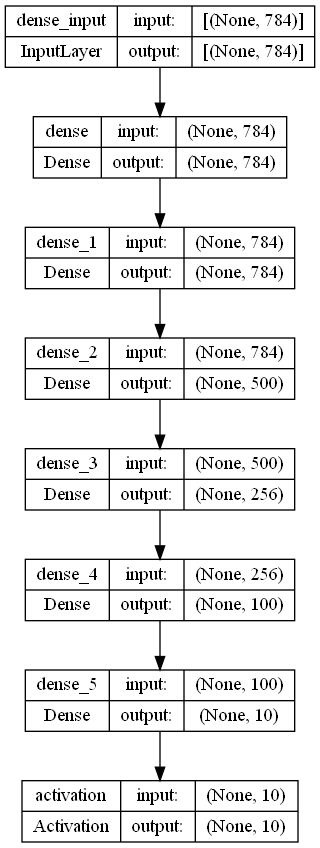

In [ ]:

plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
from keras.callbacks import EarlyStopping
import  keras.metrics as mt

In [ ]:
from sklearn.preprocessing import OneHotEncoder
y_train=np.reshape(y_train,(-1,1))
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = enc.fit_transform(y_train).toarray()

In [ ]:
y_train[2]

array([4], dtype=uint8)

In [ ]:
print (enc_df[2])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


les callbacks sont très semblable aux triggers, ils permetent de controler l'arret de l'apprentissage dans cet exemple.

Une fois que vous appelez fit (... callbacks = [es]) sur votre modèle, Keras appelle des fonctions prédéterminées. Ces fonctions peuvent être appelées en_début_train, en_fin_train, en_début_epoch, en_fin_epoch et en_début_batch, en_fin_batch.

Il est préférable d'utiliser un grand nombre au niveau de patience.

In [ ]:
from keras.callbacks import ModelCheckpoint
#keras.losses.SparseCategoricalCrossentropy()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#save_best_only=True
model.fit(x_train, enc_df, epochs=30, batch_size=batch_size,callbacks=[EarlyStopping(monitor='loss', patience=int(4)), ModelCheckpoint(filepath='./best_model/weights.{epoch:02d}.hdf5', monitor='val_loss',save_weights_only=True)])

Epoch 1/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9898
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0338 - accuracy: 0.9896
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0316 - accuracy: 0.9904
Epoch 4/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0285 - accuracy: 0.9909
Epoch 5/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0341 - accuracy: 0.9899
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0321 - accuracy: 0.9903
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0317 - accuracy: 0.9900
Epoch 8/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0281 - accuracy: 0.9913
Epoch 9/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0282 - accuracy: 0.9910
Epoch 10/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0316 - accuracy: 0.9902

In [ ]:
enc_df2 = enc.fit_transform(y_test).toarray()

ValueError: Expected 2D array, got 1D array instead:
array=[7 2 1 ... 4 5 6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
loss, acc = model.evaluate(x_test, enc_df2)
print(loss, acc)

313/313 [==============================] - 0s 901us/step - loss: 0.0768 - accuracy: 0.9827
0.07675234228372574 0.982699990272522


In [ ]:
from sklearn.preprocessing import OneHotEncoder
y_test=np.reshape(y_test,(-1,1))
# creating instance of one-hot-encoder
enc1 = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df2 = enc1.fit_transform(y_test).toarray()

In [ ]:
from keras.models import load_model
model.load_weights('./best_model/weights.14.hdf5')
print(model.evaluate(x=x_train, y=enc_df))
print (model.evaluate(x=x_test, y=enc_df2))
#test_acc = saved_model.evaluate(x=x_test, y=enc_df)
#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

60000/60000 [==============================] - 2s 31us/step
[0.007882193762204164, 0.9980833333333333]
10000/10000 [==============================] - 0s 28us/step
[0.07470840492455973, 0.9806]
